In [15]:
from qutip import *
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

In [49]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation
import imageio.v2 as imageio

In [44]:
def psi(g,e):
    return np.array([g, e])

#def pulse(t, Omega0, delPrime):
#    Omega = np.sqrt(Omega0**2 + delPrime**2)
#    
#    return np.array([[np.cos(Omega*t/2.0) -(1.0j*delPrime/Omega)*np.sin(Omega*t/2.0), (1.0j*Omega0/Omega)*np.sin(Omega*t/2.0)],
#             [(1.0j*Omega0/Omega)*np.sin(Omega*t/2.0) , np.cos(Omega*t/2.0) + (1.0j*delPrime/Omega)*np.sin(Omega*t/2.0)]])

def pulse(t, Omega0, delta, phi0, phi1):
    Omega = np.sqrt(Omega0**2 + delta**2)
    
    if Omega == 0.0:
        U = np.array([[1.0 , 0.0],
                      [0.0 , 1.0]])
        
    else:
        U = np.array([[np.cos(Omega*t/2.0) -(1.0j*delta/Omega)*np.sin(Omega*t/2.0), (1.0j*Omega0/Omega)*np.sin(Omega*t/2.0)],
                     [(1.0j*Omega0/Omega)*np.sin(Omega*t/2.0) , np.cos(Omega*t/2.0) + (1.0j*delta/Omega)*np.sin(Omega*t/2.0)]])
    
    V1 = np.array([[1.0 , 0.0],
                   [0.0 , np.exp(-1.0j*phi1)]])
    
    V0 = np.array([[1.0 , 0.0],
                   [0.0 , np.exp(1.0j*phi0)]])
    
    return np.exp(1.0j*delta*t/2.0)*V1@U@V0

def rhoee(psi):
    return (abs(psi[1]))**2.0

def rhogg(psi):
    return (abs(psi[0]))**2.0

def phi(psi):
    phi0 = math.atan2(np.real(psi[0]),np.imag(psi[0]))
    phi1 = math.atan2(np.real(psi[1]),np.imag(psi[1]))
    return (phi0-phi1)

def blochVec(psi):
    w = rhogg(psi) - rhoee(psi)  #pointed up is ground state
    if abs(w)>1.0:
        w = float(round(w))
    x = np.sin(np.arccos(w))*np.cos(phi(psi))
    y = np.sin(np.arccos(w))*np.sin(phi(psi))
    return np.array([x,y,w])

In [3]:
def ramsey(psi0, t, delta, delPrime, Omega0):
    #psi0 = initial state vector
    #t = dark time
    #delta = dark time detuning
    #delprime = pulse detuning
    #Omega0 = rabi freq.
    pi2Pulse = pulse(np.pi/(2.0*Omega0), Omega0, delPrime, 0.0, 0.0)
    freeEvo = pulse(t, 0.0, delta, 0.0, 0.0)
    
    return pi2Pulse@freeEvo@pi2Pulse@psi0

def rabi(psi0, t, delPrime, Omega0):
    piPulse = pulse(np.pi, Omega0, delPrime, 0.0, 0.0)
    return piPulse@psi0

def ramseyInj(psi0, t, delta, delPrime, Omega0, phi):
    pi2Pulse = pulse(np.pi/(2.0*Omega0), Omega0, delPrime, 0.0, 0.0)
    freeEvo = pulse(t, 0.0, delta, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, phi) 
    
    return pi2Pulse@freeEvo@pi2PhaseInj@pi2Pulse@psi0

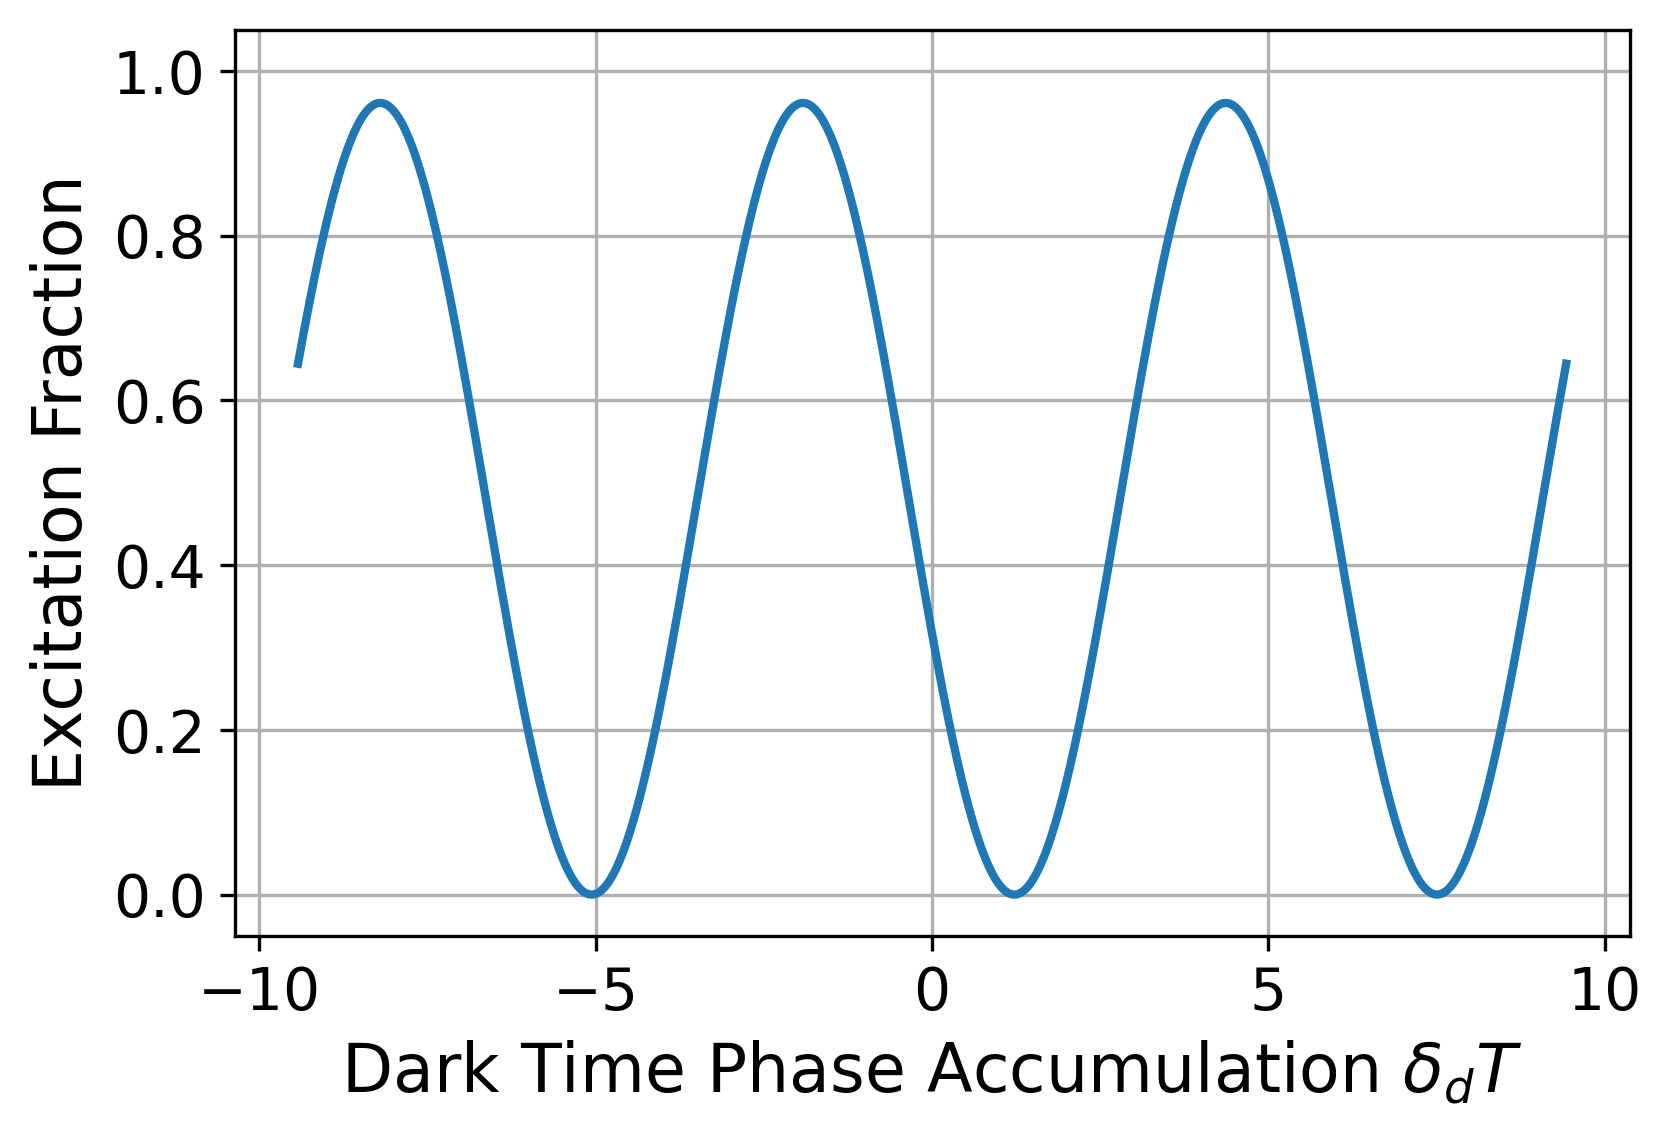

In [188]:
psi0 = psi(1.0, 0.0)
pts = 10000
deltas = np.linspace(-3*np.pi, 3*np.pi, pts)
ws = np.zeros(pts)
w2s = np.zeros(pts)
w3s = np.zeros(pts)
w4s = np.zeros(pts)
w5s = np.zeros(pts)

delPrime = 1.0

for ii in range(pts):
    #ramseyInj(psi0, t, delta, delPrime, Omega0, phi):
    ws[ii] = rhoee(ramseyInj(psi0, 1.0,  deltas[ii], 1.0, 1.0, 0.0))
    #w2s[ii] = rhoee(ramseyInj(psi0, 1.0, deltas[ii], deltas[ii]-0, 1.0, -np.pi/2.0))
    #w3s[ii] = rhoee(ramseyInj(psi0, 1.0, deltas[ii], deltas[ii]-0.0, 1.0, 0.0))
    #w4s[ii] = rhoee(ramseyInj(psi0, 1.0, deltas[ii], deltas[ii]+1, 1.0, 0.0))
    #w5s[ii] = rhoee(ramseyInj(psi0, 1.0, deltas[ii], deltas[ii]+2, 1.0, 0.0))

plt.figure(dpi=300)
plt.plot(deltas, ws, linewidth=2, label=r"$\phi = +\pi/2$")
#plt.plot(deltas, w2s, linewidth=2, label=r"$\phi = -\pi/2$")
#plt.plot(deltas, w3s, linewidth=2, label=r"$\Delta = 0$")
#plt.plot(deltas, w4s, linewidth=2, label=r"$\Delta = \Omega_0$")
#plt.plot(deltas, w5s, linewidth=2, label=r"$\Delta = 2\Omega_0$")

#plt.plot(deltas, w2s, linewidth=2, label=r"$\phi=-\pi/2$")
#plt.plot(-delPrime, 0.0, marker="x", markersize=10)

#plt.title(r"$\Delta = \Omega_0$", fontsize="16")
plt.xlabel(r'Dark Time Phase Accumulation $\delta_d T$', fontsize="16")
plt.ylabel('Excitation Fraction', fontsize="16")
plt.xticks(np.arange(-10.0, 10.1, 5), fontsize=14)
plt.yticks(np.linspace(0,1, 6), fontsize=14)
plt.ylim([-0.05,1.05])
#plt.legend(fontsize=12)
plt.grid()
plt.show()

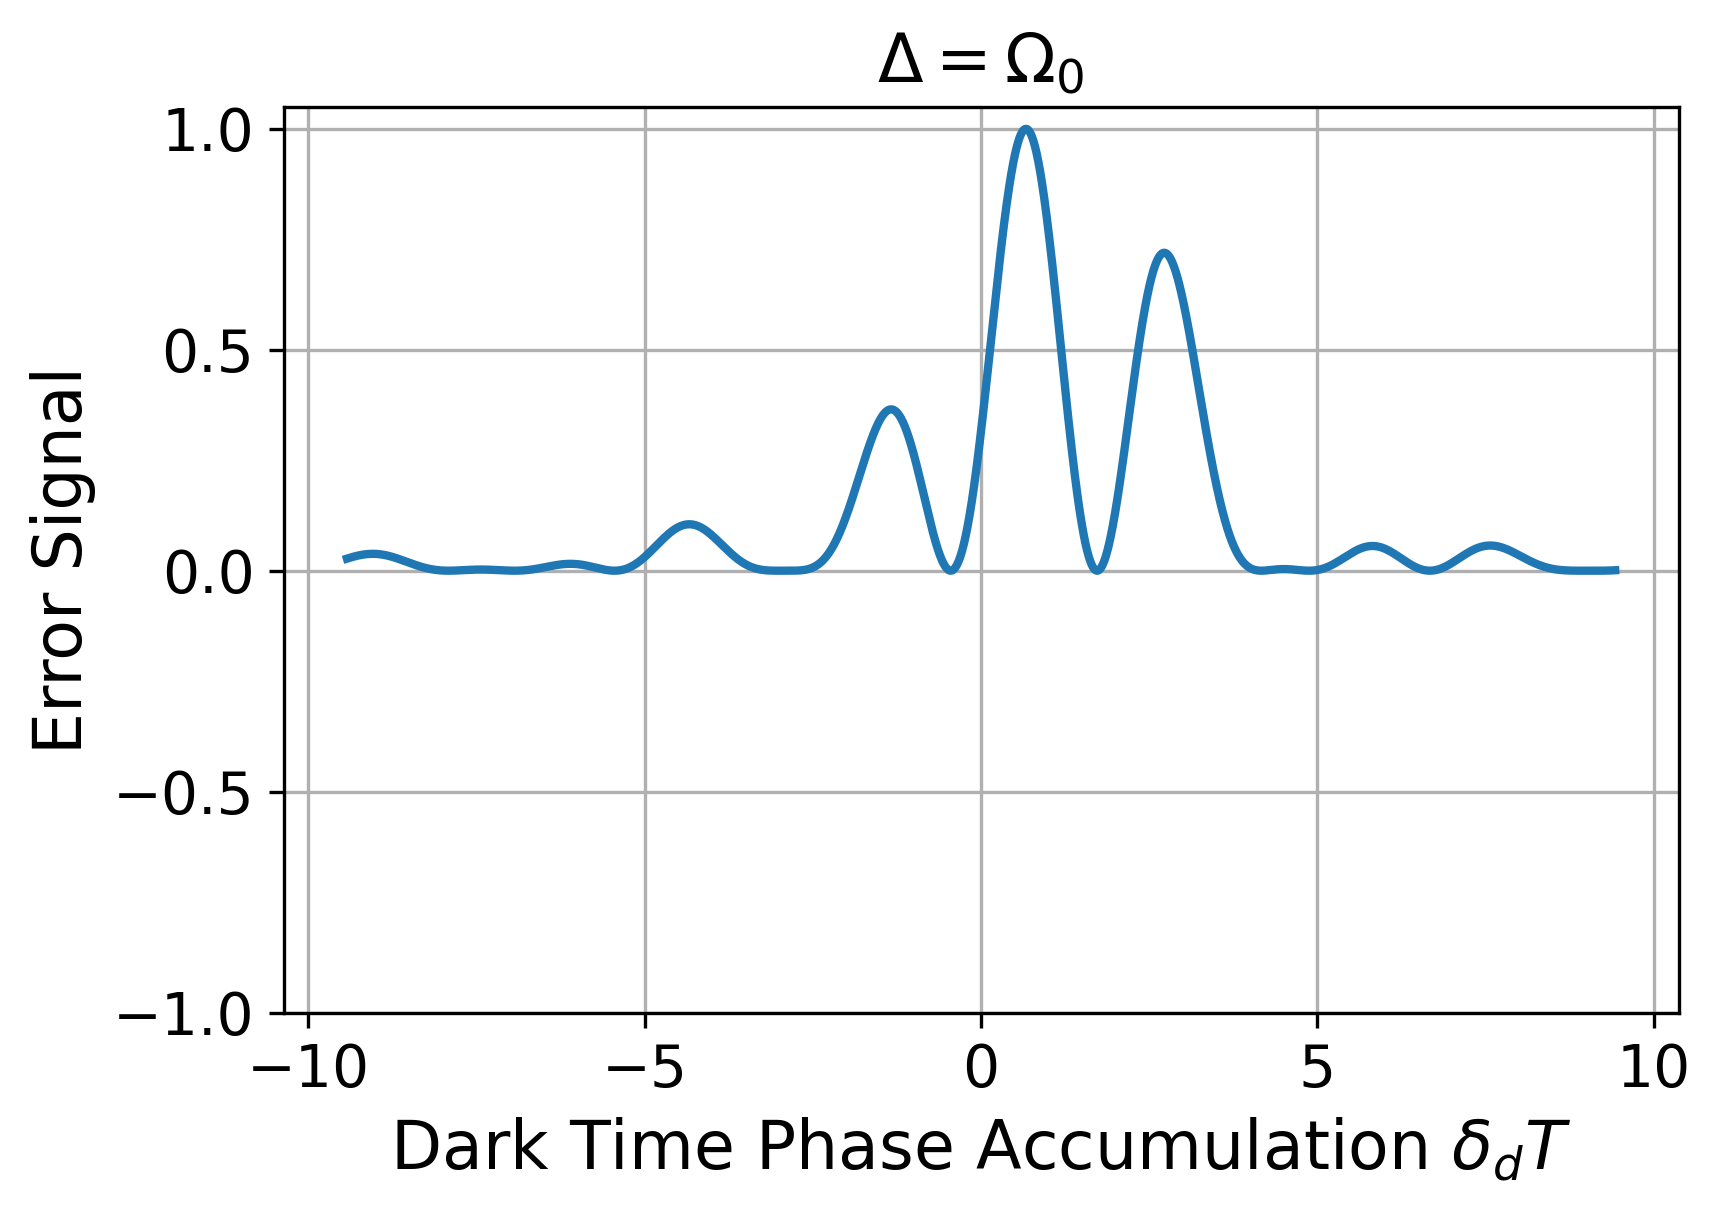

In [157]:
plt.figure(dpi=300)
plt.plot(deltas, ws-w2s, linewidth=2, label=r"$\phi = +\pi/2$")
#plt.plot(deltas, w2s, linewidth=2, label=r"$\phi = -\pi/2$")
#plt.plot(deltas, w3s, linewidth=2, label=r"$\Delta = 0$")
#plt.plot(deltas, w4s, linewidth=2, label=r"$\Delta = \Omega_0$")
#plt.plot(deltas, w5s, linewidth=2, label=r"$\Delta = 2\Omega_0$")

#plt.plot(deltas, w2s, linewidth=2, label=r"$\phi=-\pi/2$")
#plt.plot(-delPrime, 0.0, marker="x", markersize=10)

plt.title(r"$\Delta = \Omega_0$", fontsize="16")
plt.xlabel(r'Dark Time Phase Accumulation $\delta_d T$', fontsize="16")
plt.ylabel('Error Signal', fontsize="16")
plt.xticks(np.arange(-10.0, 10.1, 5), fontsize=14)
plt.yticks(np.linspace(-1,1,5), fontsize=14)
plt.grid()
#plt.legend(fontsize=12)
plt.show()

In [109]:
frames = 100
Deltas = np.linspace(-3,3,frames)
pts = 1000
delds = np.linspace(-10,10,pts)
psi0 = psi(0.0, 1.0)
ws=np.zeros(pts)

for ii in range(frames):
    for jj in range(pts):
        ws[jj] = rhoee(ramseyInj(psi0, 1.0,  delds[jj], delds[jj]-Deltas[ii], 1.0, 0.0))
    plt.figure(dpi=300)
    plt.plot(delds, ws)
    plt.xlabel(r'Dark Time Detuning $\delta_d \ (1/T)$', fontsize="16")
    plt.ylabel('Excitation Fraction', fontsize="16")
    plt.xticks(np.arange(-10.0, 10.1, 5), fontsize=14)
    plt.yticks(fontsize=14)
    #plt.legend(fontsize=12)
    plt.savefig(f'line-{ii}.png')
    plt.close()

In [114]:
with imageio.get_writer('line.gif', mode='i') as writer:
    for i in range(frames):
        image = imageio.imread(f'line-{i}.png')
        writer.append_data(image)

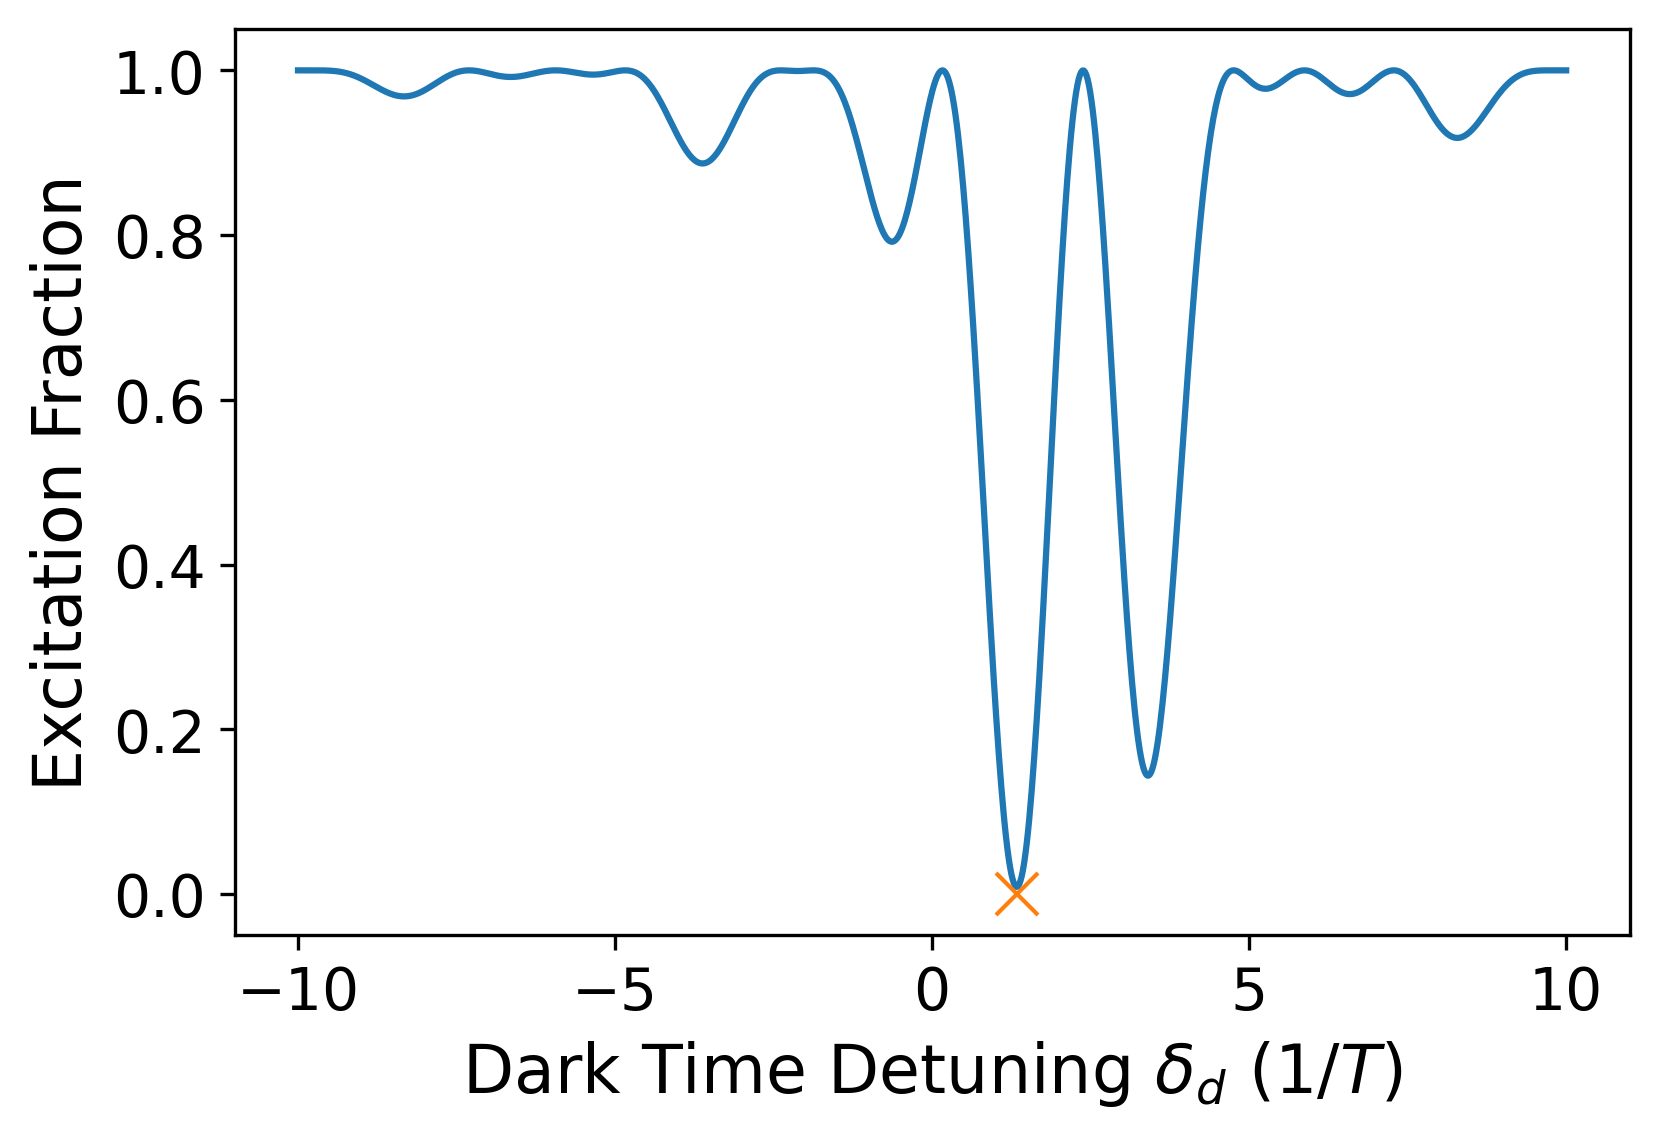

In [66]:
for jj in range(pts):
        ws[jj] = rhoee(ramseyInj(psi0, 1.0,  delds[jj], delds[jj]-2, 1.0, 0.0))
plt.figure(dpi=300)
plt.plot(delds, ws)
plt.plot(delds[np.argmin(ws)], 0.0, marker="x", markersize=10)
plt.xlabel(r'Dark Time Detuning $\delta_d \ (1/T)$', fontsize="16")
plt.ylabel('Excitation Fraction', fontsize="16")
plt.xticks(np.arange(-10.0, 10.1, 5), fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=12)
#plt.savefig(f'line-{ii}.png')
#plt.close()
plt.show()

In [90]:
pts = 10000
delds = np.linspace(-10,10,pts)
ws = np.zeros(pts)
frames = 10
Delta1s = np.linspace(-5,5,frames)
clockShift1s = np.zeros(frames)
for ii in range(frames):
    for jj in range(pts):
        ws[jj] = rhoee(ramseyInj(psi0, 1.0,  delds[jj], delds[jj]-Delta1s[ii], 1.0, 0.0))
    clockShift1s[ii] = delds[np.argmin(ws)]

In [111]:
pts = 10000
delds = np.linspace(-10,10,pts)
ws = np.zeros(pts)
frames = 100
Deltas = np.linspace(-3,3,frames)
clockShifts = np.zeros(frames)
for ii in range(frames):
    for jj in range(pts):
        ws[jj] = rhoee(ramseyInj(psi0, 1.0,  delds[jj], delds[jj]-Deltas[ii], 1.0, 0.0))
    clockShifts[ii] = delds[np.argmin(ws)]

In [113]:
for ii in range(frames):
    plt.plot(Deltas,clockShifts,linewidth=3)
    plt.plot(Deltas[ii], clockShifts[ii], marker="o", markersize=10)
    plt.xlabel(r'Light Shift Estimate Error $\Delta \ (Hz)$', fontsize="16")
    plt.ylabel(r'Clock Shift $\delta \ (Hz)$', fontsize="16")
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig(f'line1-{ii}.png')
    plt.close()

In [115]:
with imageio.get_writer('line1.gif', mode='i') as writer:
    for i in range(frames):
        image = imageio.imread(f'line1-{i}.png')
        writer.append_data(image)

In [97]:
clockShifts

array([-2.00920092, -1.92519252, -1.84318432, -1.76117612, -1.67916792,
       -1.59515952, -1.51315132, -1.43114311, -1.34913491, -1.26712671,
       -1.18511851, -1.10311031, -1.02110211, -0.93909391, -0.85708571,
       -0.77507751, -0.69506951, -0.61306131, -0.53105311, -0.4490449 ,
       -0.3670367 , -0.2850285 , -0.2050205 , -0.1230123 , -0.0410041 ,
        0.0410041 ,  0.1230123 ,  0.2050205 ,  0.2850285 ,  0.3670367 ,
        0.4490449 ,  0.53105311,  0.61306131,  0.69506951,  0.77507751,
        0.85708571,  0.93909391,  1.02110211,  1.10311031,  1.18511851,
        1.26712671,  1.34913491,  1.43114311,  1.51315132,  1.59515952,
        1.67916792,  1.76117612,  1.84318432,  1.92519252,  2.00920092])

In [116]:
dpts = 50
Deltapts = np.linspace(-5,5,50)
shiftpts = Deltapts*2.0*2.00920092/6.0

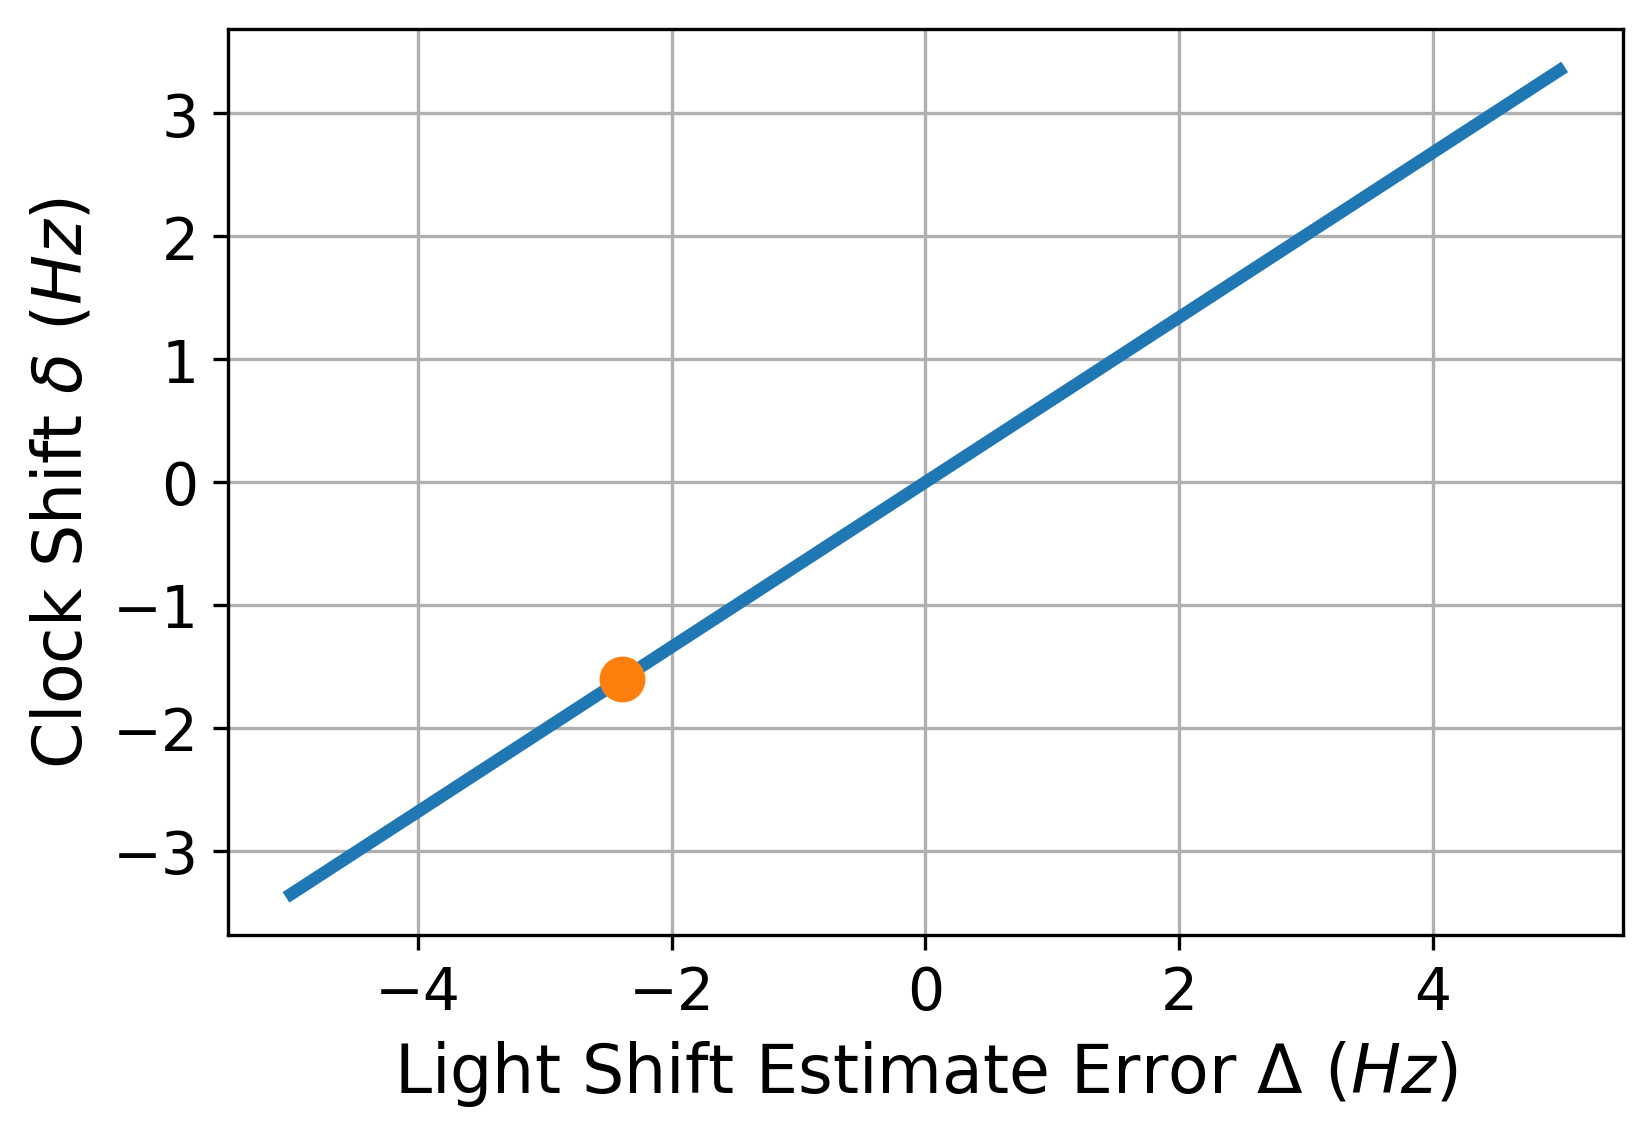

In [119]:
plt.figure(dpi=300)
plt.plot(Deltapts,shiftpts,linewidth=3)
plt.plot(Deltas[10], clockShifts[10], marker="o", markersize=10)
plt.xlabel(r'Light Shift Estimate Error $\Delta \ (Hz)$', fontsize="16")
plt.ylabel(r'Clock Shift $\delta \ (Hz)$', fontsize="16")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

In [120]:
for ii in range(frames):
    plt.figure(dpi=300)
    plt.plot(Deltapts, shiftpts,linewidth=3)
    plt.plot(Deltas[ii], clockShifts[ii], marker="o", markersize=10)
    plt.xlabel(r'Light Shift Estimate Error $\Delta \ (Hz)$', fontsize="16")
    plt.ylabel(r'Clock Shift $\delta \ (Hz)$', fontsize="16")
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid()
    plt.savefig(f'line1-{ii}.png')
    plt.close()

In [121]:
with imageio.get_writer('line1.gif', mode='i') as writer:
    for i in range(frames):
        image = imageio.imread(f'line1-{i}.png')
        writer.append_data(image)

In [108]:
Deltas

array([-3.        , -2.87755102, -2.75510204, -2.63265306, -2.51020408,
       -2.3877551 , -2.26530612, -2.14285714, -2.02040816, -1.89795918,
       -1.7755102 , -1.65306122, -1.53061224, -1.40816327, -1.28571429,
       -1.16326531, -1.04081633, -0.91836735, -0.79591837, -0.67346939,
       -0.55102041, -0.42857143, -0.30612245, -0.18367347, -0.06122449,
        0.06122449,  0.18367347,  0.30612245,  0.42857143,  0.55102041,
        0.67346939,  0.79591837,  0.91836735,  1.04081633,  1.16326531,
        1.28571429,  1.40816327,  1.53061224,  1.65306122,  1.7755102 ,
        1.89795918,  2.02040816,  2.14285714,  2.26530612,  2.3877551 ,
        2.51020408,  2.63265306,  2.75510204,  2.87755102,  3.        ])

In [168]:
t=1
Omega0 =1
delta = Omega0
psi0 = psi(1.0, 0.0)

rhoee(pulse(t, Omega0, delta, 0, 0)@pulse(t, Omega0, delta, 0, 0)@psi0)

0.48784078203146186

In [169]:
def ramsey(psi0, t, delta, delPrime, Omega0):
    #psi0 = initial state vector
    #t = dark time
    #delta = dark time detuning
    #delprime = pulse detuning
    #Omega0 = rabi freq.
    #pulse(t, Omega0, delta, phi0, phi1):
    pi2Pulse = pulse(np.pi/(2.0*Omega0), Omega0, delPrime, 0.0, 0.0)
    freeEvo = pulse(t, 0.0, delta, 0.0, 0.0)
    
    return pi2Pulse@freeEvo@pi2Pulse@psi0

In [176]:
deltas[np.argmax(ws)]+2.0*np.pi

-1.9181341284294113